In [1]:
import os
from dotenv import load_dotenv
load_dotenv()

from langchain_groq import ChatGroq

os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")


llm=ChatGroq(model="llama-3.1-8b-instant")
result=llm.invoke("Hello")
result

AIMessage(content='Hello. How can I assist you today?', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 10, 'prompt_tokens': 36, 'total_tokens': 46, 'completion_time': 0.017039265, 'completion_tokens_details': None, 'prompt_time': 0.004893089, 'prompt_tokens_details': None, 'queue_time': 0.070585201, 'total_time': 0.021932354}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_f757f4b0bf', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019b998f-a063-7eb0-a737-6869dd2d833f-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 36, 'output_tokens': 10, 'total_tokens': 46})

In [36]:
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START,END
from IPython.display import Image, display
from pydantic import BaseModel, Field

from pydantic import BaseModel

class State(BaseModel):
    topic: str
    characters: str | None = None
    settings: str | None = None
    premises: str | None = None

    story_intro: str | None = None


In [37]:
## Nodes for the graph

def generate_characters(state:State):
    """Generate character descriptions"""
    msg = llm.invoke(f"Create two character names and breif traits for a story about {state.topic}")
    return {"characters":msg.content} 

def generate_setting(state:State):
    """Generate the story Setting"""
    msg = llm.invoke(f"Describe a vivid setting for a story about {state.topic}")
    return {"settings":msg.content}

def generate_premise(state:State):
    """ Generate a story premise """
    msg = llm.invoke(f"Write a one-sentence plot premise for a story about {state.topic}")
    return {"premises":msg.content}

def combine_elements(state: State):
    """Combine characters, setting, and premise into an intro"""
    msg = llm.invoke(
        f"Write a short story introduction using these elements:\n"
        f"Characters: {state.characters}\n"
        f"Setting: {state.settings}\n"
        f"Premise: {state.premises}"
    )
    return {"story_intro": msg.content}

In [38]:
graph = StateGraph(State)
graph.add_node("character", generate_characters)
graph.add_node("setting", generate_setting)
graph.add_node("premise", generate_premise)
graph.add_node("combine", combine_elements)

In [39]:
graph.add_edge(START, "character")
graph.add_edge(START, "setting")
graph.add_edge(START, "premise")
graph.add_edge("character", "combine")
graph.add_edge("setting", "combine")
graph.add_edge("premise", "combine")
graph.add_edge("combine", END)


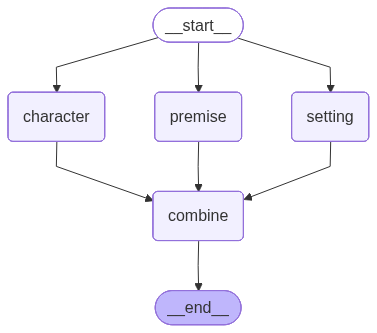

In [40]:
compiled_graph = graph.compile()
graph_image = compiled_graph.get_graph().draw_mermaid_png()
display(Image(graph_image))

In [41]:
state = {"topic": "time travel"}
result = compiled_graph.invoke(state)
print(result["story_intro"])

As the neon-lit corridors of Chronos' Gate hummed with an otherworldly energy, Dr. Ethan Thompson and Ava Moreno stood at the edge of a vast, circular chamber, their eyes fixed on the heart of the facility: a labyrinthine contraption known as the "Chrono- Accelerator." The air was alive with an electric tension, as if the very fabric of time itself was straining against the boundaries of the machine.

Ethan, a brilliant physicist with a mind as sharp as a razor, felt an inexplicable sense of unease wash over him as he gazed upon the Accelerator's pulsating core. His logical mind struggled to comprehend the mysteries of the machine, but his intuition whispered that something was amiss.

Ava, on the other hand, stood transfixed by the ancient symbols etched into the walls of the chamber. As a historian, she had always been drawn to the mysteries of the past, and the Chronos' Gate facility seemed to be a treasure trove of secrets waiting to be unraveled. Her eyes danced across the ancient